In [1]:
import snscrape.modules.twitter as sntwitter
import json
import pandas as pd
import sqlalchemy
from sqlalchemy.orm import sessionmaker
import requests
from datetime import datetime
import sqlite3

In [17]:
pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 212.5 kB/s eta 0:00:00



In [20]:
pip install textblob


     ------------------------------------ 636.8/636.8 kB 348.6 kB/s eta 0:00:00


In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [25]:
import re
from wordcloud import WordCloud
from textblob import TextBlob
import matplotlib.pyplot as plt

In [23]:
#create a list to append tweet data to
#Data from Peter Obi tweets

Obi_keywords = "(from:PeterObi) until:2022-07-04 since:2022-03-01"
maxTweets = 1000
tweets_lists = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(Obi_keywords).get_items()):
    if i > maxTweets:
        break
    tweets_lists.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.quoteCount, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.user.displayname])

# Creating a dataframe from the tweets list above
Obi_tweets = pd.DataFrame(tweets_lists, columns=['Datetime', 'Tweet_Id', 'Tweet', 'Username', 'Quoted_tweet_count', 'Reply_count', 'Retweet_count', 'Like_count', 'Display_name'])

if pd.Series(Obi_tweets['Tweet_Id']).is_unique:
    pass
else:
    raise Exception("Primary Key check is violated")
    
#cleaning the tweets    
clean_tweets = []
for tweet in Obi_tweets['Tweet']:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub("pic.twitter.com\/[^\s]+","",tweet)
    ##Here's where all the cleaning takes place
    clean_tweets.append(tweet)
Obi_tweets['Tweet'] = clean_tweets

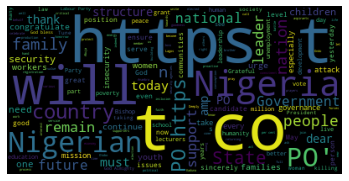

In [26]:
#Generate a wordcloud from their tweets

text = Obi_tweets['Tweet'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
Obi_tweets.head()

,Datetime,Tweet_Id,Tweet,Username,Quoted_tweet_count,Reply_count,Retweet_count,Like_count,Display_name
0,2022-07-03 13:36:18+00:00,1543589451217215488,Even as our message continues to gain broad ac...,PeterObi,131,656,4606,18562,Peter Obi
1,2022-07-03 13:36:17+00:00,1543589447765221377,While the frustration and anger in the country...,PeterObi,59,268,4083,16614,Peter Obi
2,2022-07-03 13:36:16+00:00,1543589444640464896,I sincerely thank my supporters for believing ...,PeterObi,1427,5753,16264,59157,Peter Obi
3,2022-07-01 10:08:09+00:00,1542812293183963137,"We will never mock any faith, ethnicity or gen...",PeterObi,121,620,4946,20077,Peter Obi
4,2022-07-01 10:08:08+00:00,1542812288951910401,The inclusion of my picture on the praying mat...,PeterObi,592,3017,10851,44542,Peter Obi


In [28]:
#create a list to append tweet data to
#Data from Atiku tweets

Atiku_keywords = "(from:atiku) until:2022-07-04 since:2022-03-01"
maxTweets = 1000
tweets_lists = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(Atiku_keywords).get_items()):
    if i > maxTweets:
        break
    tweets_lists.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.quoteCount, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.user.displayname])

# Creating a dataframe from the tweets list above
Atiku_tweets = pd.DataFrame(tweets_lists, columns=['Datetime', 'Tweet_Id', 'Tweet', 'Username', 'Quoted_tweet_count', 'Reply_count', 'Retweet_count', 'Like_count', 'Display_name'])

if pd.Series(Atiku_tweets['Tweet_Id']).is_unique:
    pass
else:
    raise Exception("Primary Key check is violated")
    
#cleaning the tweets    
clean_tweets2 = []
for tweet in Atiku_tweets['Tweet']:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub("pic.twitter.com\/[^\s]+","",tweet)
    ##Here's where all the cleaning takes place
    clean_tweets2.append(tweet)
Atiku_tweets['Tweet'] = clean_tweets2

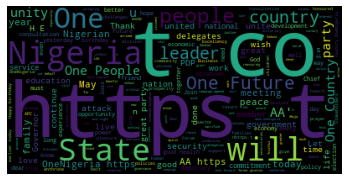

In [29]:
text = Atiku_tweets['Tweet'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
Atiku_tweets.head()

,Datetime,Tweet_Id,Tweet,Username,Quoted_tweet_count,Reply_count,Retweet_count,Like_count,Display_name
0,2022-07-03 13:20:48+00:00,1543585552204709889,I also mourn the passing away of Hon. Jude Ise...,atiku,8,51,80,526,Atiku Abubakar
1,2022-07-03 13:20:48+00:00,1543585549453230080,It is not the wish of any parents to bury thei...,atiku,21,287,314,1759,Atiku Abubakar
2,2022-07-02 17:03:03+00:00,1543279092333772802,Getting this country back on track will requir...,atiku,146,1002,796,2316,Atiku Abubakar
3,2022-07-01 20:15:35+00:00,1542965160997953536,"As you enter into a new chapter of your life, ...",atiku,4,56,81,465,Atiku Abubakar
4,2022-07-01 20:15:35+00:00,1542965158103945218,"On behalf of my family, I wish to felicitate w...",atiku,13,212,234,1718,Atiku Abubakar


In [33]:
#create a list to append tweet data to
#Data from Tinubu tweets

Tinubu_keywords = "(from:officialABAT) until:2022-07-04 since:2022-03-01"
maxTweets = 1000
tweets_lists = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(Tinubu_keywords).get_items()):
    if i > maxTweets:
        break
    tweets_lists.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.quoteCount, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.user.displayname])

# Creating a dataframe from the tweets list above
Tinubu_tweets = pd.DataFrame(tweets_lists, columns=['Datetime', 'Tweet_Id', 'Tweet', 'Username', 'Quoted_tweet_count', 'Reply_count', 'Retweet_count', 'Like_count', 'Display_name'])

if pd.Series(Tinubu_tweets['Tweet_Id']).is_unique:
    pass
else:
    raise Exception("Primary Key check is violated")

    
#cleaning the tweets    
clean_tweets3 = []
for tweet in Tinubu_tweets['Tweet']:
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub("pic.twitter.com\/[^\s]+","",tweet)
    ##Here's where all the cleaning takes place
    clean_tweets3.append(tweet)
Tinubu_tweets['Tweet'] = clean_tweets3

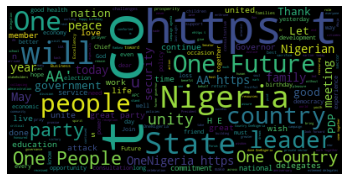

In [34]:
Tinubu = Obi_tweets['Tweet'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [35]:
Tinubu_tweets.head()

,Datetime,Tweet_Id,Tweet,Username,Quoted_tweet_count,Reply_count,Retweet_count,Like_count,Display_name
0,2022-06-28 21:12:13+00:00,1541892248354394112,I specially congratulate the Honorable Ministe...,officialABAT,34,553,665,3870,Bola Ahmed Tinubu
1,2022-06-26 23:35:41+00:00,1541203575208120320,Congratulations RT Hon Femi Gbajabiamila http...,officialABAT,14,145,191,1245,Bola Ahmed Tinubu
2,2022-06-26 23:34:13+00:00,1541203206759501830,Congratulations RT Hon Femi Gbajabiamila http...,officialABAT,8,117,270,1769,Bola Ahmed Tinubu
3,2022-06-25 13:38:14+00:00,1540690834395258880,I congratulate our dear Mr. Governor Babajide...,officialABAT,77,917,753,5207,Bola Ahmed Tinubu
4,2022-06-24 17:53:29+00:00,1540392683788697600,Friday prayers \n\n#BAT23 https://t.co/6LcCiowPFB,officialABAT,84,410,562,2481,Bola Ahmed Tinubu


In [9]:
Tinubu_tweets.dtypes

Datetime               object
Tweet_Id               object
Tweet                 float64
Username               object
Quoted_tweet_count     object
Reply_count            object
Retweet_count          object
Like_count             object
Display_name           object
dtype: object

In [10]:
DATABASE_LOCATION = "sqlite:///presidential_aspirant1.sqlite"

In [13]:
#engine
engine = sqlalchemy.create_engine(DATABASE_LOCATION) #creating the db
conn = sqlite3.connect('presidential_aspirant1.sqlite') #initiating a connection to the db
cursor = conn.cursor() #cursor a pointer which allows us refer to specific rolls in our dbs

In [14]:
#Write some SQL query to create a new table for our data.

#Aspirant's table
sql_query = """ CREATE TABLE IF NOT EXISTS presidential_aspirant1(
                    Datetime datetime64[ns, UTC],
                    Tweet_Id int64,
                    Tweet object,
                    Username object,
                    Quoted_tweet_count int64,
                    Reply_count int64,
                    Retweet_count int64,
                    Like_count int64,
                    Display_name object,
                    CONSTRAINT primary_key_constraint PRIMARY KEY (Tweet_Id)
                );"""

sql_query2 = """ CREATE TABLE IF NOT EXISTS presidential_aspirant_atiku(
                        Datetime datetime64[ns, UTC],
                        Tweet_Id int64,
                        Tweet object,
                        Username object,
                        Quoted_tweet_count int64,
                        Reply_count int64,
                        Retweet_count int64,
                        Like_count int64,
                        Display_name object,
                        CONSTRAINT primary_key_constraint PRIMARY KEY (Tweet_Id)
                    ); """
    
sql_query3 = """ CREATE TABLE IF NOT EXISTS presidential_aspirant_tinubu(
                        Datetime datetime64[ns, UTC],
                        Tweet_Id int64,
                        Tweet object,
                        Username object,
                        Quoted_tweet_count int64,
                        Reply_count int64,
                        Retweet_count int64,
                        Like_count int64,
                        Display_name object,
                        CONSTRAINT primary_key_constraint PRIMARY KEY (Tweet_Id)
                    ); """

cursor.execute(sql_query)
cursor.execute(sql_query2)
cursor.execute(sql_query3)
print("Successfully opened")

Successfully opened


In [15]:
#Load the pandas dataframe into sql db
#Loading Obi's tweets into the db
try:
    Obi_tweets.to_sql("presidential_aspirant1", con=engine, index=False, if_exists='append')
except:
    print("Data already exists")
    
conn.close()

#Loading Atiku's tweets into the db
try:
    Atiku_tweets.to_sql("presidential_aspirant_atiku", con=engine, index=False, if_exists='append')
except:
    print("Data already exists")
    
conn.close()

#Loading Tinubu's tweets into the db
try:
    Tinubu_tweets.to_sql("presidential_aspirant_tinubu", con=engine, index=False, if_exists='append')
except:
    print("Data already exists")
    
conn.close()

print("Close database successfully")

Close database successfully
